In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
# import matplotlib as mpl
import matplotlib.pyplot as plt

SEED = 5

# Features

In [2]:
# importing features and target with pandas library

data_uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
data = pd.read_csv(data_uri)

In [3]:
#shows frist 5 instances from data
data.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

In [4]:
# mapping columns to rename, text in portuguese-brazilian
map = {
    'unfinished' : 'incompleto',
    'expected_hours' : 'horas',
    'price' : 'preco'
}

data = data.rename(columns = map)

In [5]:
map = {
    1 : 0,
    0 : 1
}

data['finalizado'] = data.incompleto.map(map)

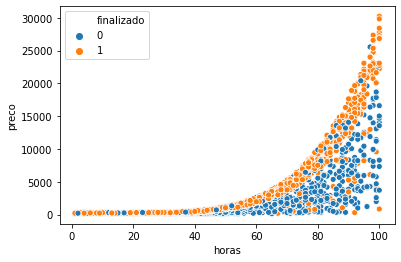

In [6]:
sns.scatterplot(x = 'horas', y = 'preco', data = data, hue='finalizado')

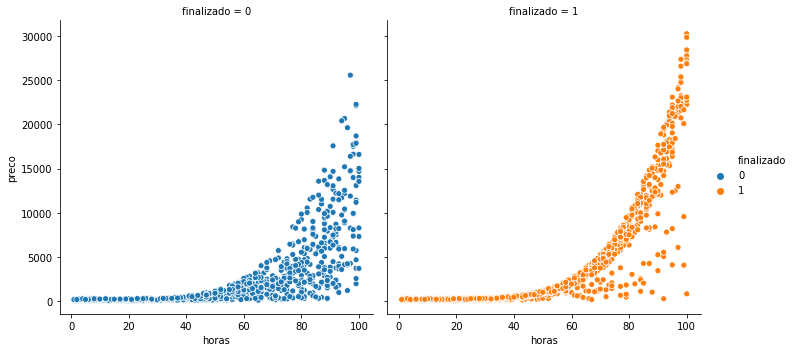

In [7]:
sns.relplot(x = 'horas', y = 'preco', data = data, col='finalizado', hue='finalizado')

In [8]:
# split features from target
x = data[['horas', 'preco']]
y = data['finalizado']

In [9]:
# size of data, in this example, has 99 instances and 4 features
data.shape

(2157, 4)

In [10]:
# Manual separation of train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED,
                                                    stratify = y) # on separation mantains the proportion of dataset

print("Treino X: ", train_x.shape)
print("Treino Y: ", train_y.shape)
print("Teste X : ", test_x.shape)
print("Teste Y : ", test_y.shape)

Treino X:  (1617, 2)
Treino Y:  (1617,)
Teste X :  (540, 2)
Teste Y :  (540,)


# Itens

# Treino do estimador

In [11]:
model = LinearSVC()
model.fit(train_x, train_y)

/home/tacito/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Testes

In [12]:
previsoes = model.predict(test_x)

# Taxa de acerto - accuracy

In [13]:
taxa_acerto = accuracy_score(test_y, previsoes)
print("Accuracy: %.2f%%" % (taxa_acerto * 100))

Accuracy: 50.93%


# Criação da Baseline

In [14]:
baseline = np.ones(540)

# Previsão da Baseline

In [15]:
model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

taxa_acerto = accuracy_score(test_y, baseline)
print("Accuracy: %.2f%%" % (taxa_acerto * 100))

Accuracy: 52.59%


/home/tacito/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Otimização

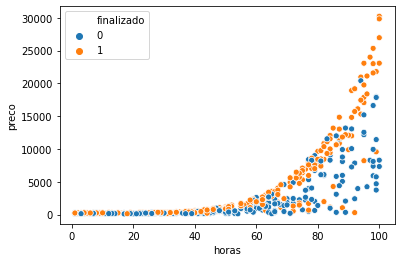

In [16]:
sns.scatterplot(x = 'horas', y = 'preco', data = test_x, hue=test_y)

In [17]:
x_min = test_x.horas.min()
x_max = test_x.horas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [18]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [19]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [20]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [21]:
z = model.predict(pontos)

In [22]:
print(z.shape)
z = z.reshape(xx.shape)

(10000,)


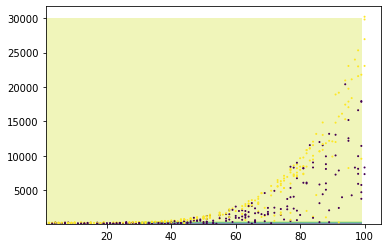

In [23]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.horas, test_x.preco, c=test_y, s=1)